In [1]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
73795,73795,sell,apartment,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,"3,427,451.0","-34.5918286422,-58.5108560341",-34.5918286422,...,47.0,"1,798.0769230769226","1,989.3617021276602",nan,nan,nan,http://www.properati.com.ar/1ao4s_venta_depart...,"Departamento 52m² en San Martin Av. 6900, Capi...",Departamento en V.Devoto,https://thumbs4.properati.com/6/jreHSWXZpLDz1w...
78264,78264,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"3,430,787.0","-34.6530683936,-58.5120320346",-34.6530683936,...,40.0,"2,211.5384615384614","2,875.0",nan,nan,nan,http://www.properati.com.ar/1atxb_venta_depart...,Venta Departamento de 2 ambientes en Pozo – Ma...,Venta Departamento 2 Ambientes en Pozo - Matad...,https://thumbs4.properati.com/9/NJ3BqDqR2WTyrv...
93497,93497,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,"3,430,863.0",NaN,nan,...,85.0,"2,936.842105263158","3,282.3529411764707",nan,nan,"1,900.0",http://www.properati.com.ar/1be9e_venta_depart...,"Venta de 3 amb. a la calle con amplio balcon, ...","3 amb. moderno, con cochera para 2 autos - Edi...",https://thumbs4.properati.com/3/9shhhUukGzeFFr...
46587,46587,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,"3,838,574.0","-32.945106,-60.640814",-32.945106,...,45.0,"1,822.2222222222226","1,822.2222222222226",nan,4.0,nan,http://www.properati.com.ar/196cd_venta_depart...,"1119-JM00023 Rosario: Entre Rios 720, piso 5. ...","Rosario: Entre Rios 720, Departamento 1 dormit...",https://thumbs4.properati.com/2/m71uIfNRRCBbvd...
3284,3284,sell,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Argentina,Bs.As. G.B.A. Zona Oeste,"3,433,359.0","-34.65702438,-58.67539597",-34.65702438,...,36.0,nan,nan,nan,1.0,nan,http://www.properati.com.ar/15l08_venta_casa_i...,"Loft conformado por un living comedor, cocina ...",U$D 120.000 - Casa en Venta -,https://thumbs4.properati.com/1/fruVpU8cHfi1oi...
101799,101799,sell,apartment,El Palomar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|El P...,Argentina,Bs.As. G.B.A. Zona Oeste,"3,434,509.0",NaN,nan,...,40.0,"1,925.0","1,925.0",nan,nan,nan,http://www.properati.com.ar/1bptk_venta_depart...,Departamentos de dos ambientes. A una cuadra ...,Departamento - El Palomar,https://thumbs4.properati.com/2/nmMXI0Q-NiMbT6...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [4]:
# Columna price_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 33562
Porcentaje de registros con NaN: 27.686850354726943
Contamos cantidad de registros unicos:
            price_per_m2  count
0     1.5102040816326532      1
1     3.2085561497326203      1
2      7.462100384887282      1
3      7.987660441800253      1
4      8.291223078055243      1
...                  ...    ...
25180        1,825,000.0      1
25181        2,000,000.0      1
25182        2,300,000.0      1
25183        2,600,000.0      1
25184       3,999,999.96      1

[25185 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

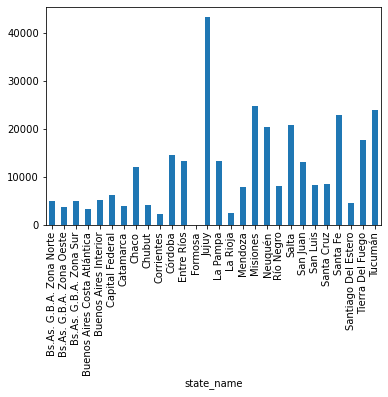

In [5]:
#graficamos el dato por Estado con el fin de observar los rangos de precios por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_per_m2'].mean().plot.bar()

In [7]:
data.price_per_m2.describe()

count              87,658.0
mean     6,912.215704519683
std     28,378.644733892193
min      1.5102040816326532
25%                 1,550.0
50%      2,213.114754098361
75%     3,355.5486111111113
max            3,999,999.96
Name: price_per_m2, dtype: float64

Detalle de análisis de columnas:
* `price_per_m2` -> Esta columna tiene 33.562 datos nulos o su equivalente 27.68%. Consideramos que esta variable es relevante para la proyección, y podriamos completarla realizando diferentes operaciones:
Los datos tienen un valor máximo de 3,999,999 dolares por metro cuadrado, frente a una media de 6,912 dolares por metro cuadrado.
1. Extrayendo el dato de las columnas title y description
2. calculando el precio al dividir el precio aprox en usd entre la superficie cubierta en m2
3. calculando un valor promedio para el metro cuadrado de las propiedades de acuerdo al barrio o place name donde se encuentren ubicados.

### Detalle de valores extremos en la  columna `price_per_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 10 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

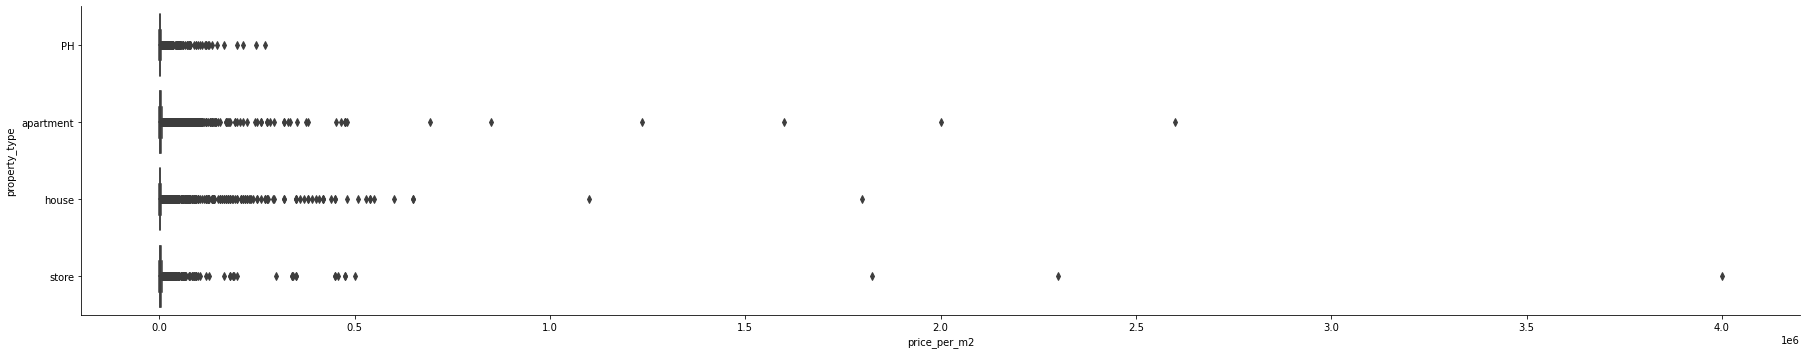

In [8]:
sns.catplot(data=data, x= 'price_per_m2', y="property_type", kind="box", height=5, aspect=5,)
